# These are the scores from thirty-five otherwise identical runs in which only the <span style="color:red">number of epochs</span> is varied.

In [17]:
from pandas import read_csv

scores = read_csv('runs.csv', sep='\t')
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
job         119 non-null int64
seqlen      119 non-null int64
epochs      119 non-null int64
lrate       119 non-null float64
times       119 non-null object
f_in        119 non-null object
f_out       119 non-null object
embsize     119 non-null int64
n_heads     119 non-null int64
n_enc       119 non-null int64
n_dec       119 non-null int64
network     119 non-null object
complete    119 non-null float64
distinct    119 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 13.1+ KB


In [18]:
scores

,job,seqlen,epochs,lrate,times,f_in,f_out,embsize,n_heads,n_enc,n_dec,network,complete,distinct
0,1192,4,14,0.000198,"(""18:47:56"", ""21:35:10"")",t-in_voc,t-out,512,8,3,3,transformer,0.718206,"[0.9414924489865595, 0.9471941185173383, 0.946..."
1,1344,4,14,0.000008,"(""17:23:41"", ""20:10:02"")",t-in_voc,t-out,512,8,3,3,transformer,0.382103,"[0.7952975452093457, 0.7879684530380453, 0.782..."
2,1345,4,14,0.000010,"(""17:23:42"", ""20:09:12"")",t-in_voc,t-out,512,8,3,3,transformer,0.430072,"[0.8177628059952884, 0.8167271734058655, 0.813..."
3,1346,4,14,0.000012,"(""17:23:47"", ""20:12:51"")",t-in_voc,t-out,512,8,3,3,transformer,0.480556,"[0.842834219121647, 0.8435284343738975, 0.8417..."
4,1347,4,14,0.000016,"(""17:30:19"", ""20:16:39"")",t-in_voc,t-out,512,8,3,3,transformer,0.539542,"[0.871069432905803, 0.8718091704696764, 0.8700..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2595,7,32,0.000738,"(""11:16:05"", ""17:38:16"")",t-in_voc,t-out,512,8,3,3,transformer,0.743956,"[0.9410723171818403, 0.9508627373829721, 0.951..."
115,2596,7,32,0.000740,"(""11:16:06"", ""17:29:56"")",t-in_voc,t-out,512,8,3,3,transformer,0.739524,"[0.9396373146937311, 0.9496013239055213, 0.950..."
116,2597,7,32,0.000742,"(""17:05:03"", ""23:19:52"")",t-in_voc,t-out,512,8,3,3,transformer,0.706125,"[0.9273819305412505, 0.9424726018678178, 0.943..."
117,2598,7,32,0.000746,"(""17:08:27"", ""23:29:15"")",t-in_voc,t-out,512,8,3,3,transformer,0.041152,"[0.6109407367117612, 0.42705211142099964, 0.30..."


In [19]:
# Find the combination of sequence length and learning rate
# of which we have the most runs.
cols = ['seqlen', 'lrate']
seqlen, lrate = scores[cols].apply(tuple, 1).mode()[0]
print(f'Choosing sequence length = {seqlen} and learning rate = {lrate}.')

Choosing sequence length = 4.0 and learning rate = 0.000205.


In [20]:
# Make a dataframe of the selection and sort it on learning rate.
df = scores[(scores['seqlen'] == seqlen) & (scores['lrate'] == lrate)].sort_values(by='epochs')
print(f'Selection comprises {len(df)} entries.')

Selection comprises 35 entries.


# Let us first investigate the relation between the scores on the complete strings and the number of epochs.

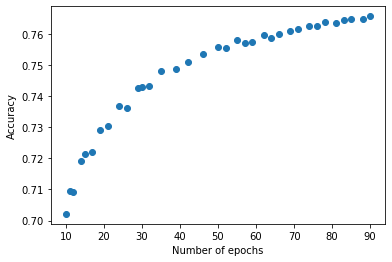

In [21]:
# Create a scatter plot of the values
from numpy import array
from matplotlib.pyplot import plot, xlabel, ylabel

x = array(df['epochs'])
y = array(df['complete'])

xlabel('Number of epochs')
ylabel('Accuracy')
plot(x, y, 'o')

These points suggest a build-up towards an asymptotic value. Let us first try to find a function that approximates this build-up, so we can estimate the asymptotic value. The shape is reminiscent of $a x^r (b+x)^{-r}$, so we try this function first.

In [22]:
from numpy import mean, sum

# Return the coefficient of determination of the predicted values (y1)
# against the observed values (y0).

def r_squared(y0, y1):
    residuals = y0 - y1
    ss_res = sum(residuals**2)
    ss_tot = sum((y0 - mean(y0))**2)
    return 1 - (ss_res / ss_tot)

In [23]:
from scipy.optimize import curve_fit

def f(x,a,b,r):
    return a * x**r / (b + x)**r

fit = curve_fit(f, x, y)
[a,b,r] = fit[0]
print(f'R2 = {r_squared(array(y), f(x,a,b,r))}.')

R2 = 0.9963820289468648.


Estimation of asymptotic value is 0.78.


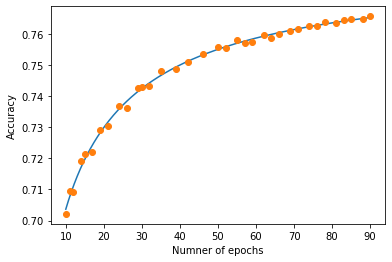

In [24]:
from numpy import linspace

xlabel('Numner of epochs')
ylabel('Accuracy')
xi = linspace(x[0], x[-1], len(x)**2)
plot(xi, f(xi,a,b,r), '-')
plot(x, y, 'o')
m = a
print(f'Estimation of asymptotic value is {m:.2f}.')

# Now, let us do the same for the scores on the distinct words.

In [25]:
# Turn the objects in the 'distinct' column into proper lists
# and extract the maximum value from each of them.
y = array(df['distinct'].apply(eval).apply(max))

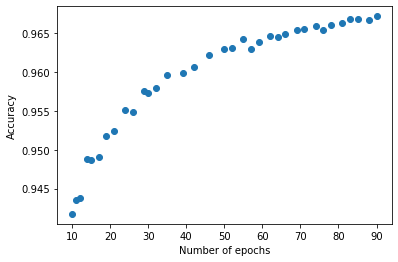

In [26]:
# Create a scatter plot of the values
from matplotlib.pyplot import plot

xlabel('Number of epochs')
ylabel('Accuracy')
plot(x, y, 'o')

In [27]:
fit = curve_fit(f, x, y)
[a,b,r] = fit[0]
#print(fit)
print(f'R2 = {r_squared(y, f(x,a,b,r))}.')

R2 = 0.9954005630553148.


Estimation of asymptotic value is 0.974.


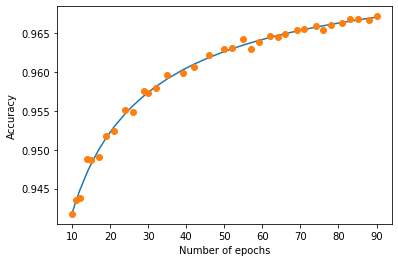

In [28]:
xlabel('Number of epochs')
ylabel('Accuracy')
plot(x, f(x,a,b,r), '-')
plot(x, y, 'o')
m = a
print(f'Estimation of asymptotic value is {m:.3f}.')

# How does the number of epochs influence the running time?

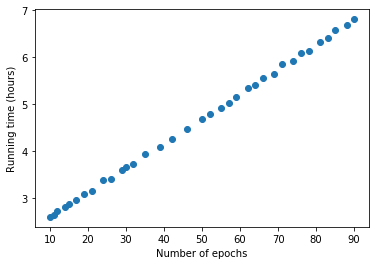

In [29]:
from datetime import datetime

def time(s):
    fmt = '%H:%M:%S'
    return datetime.strptime(s, fmt)

running_times = list(df['times'].apply(eval))
dt = []

for t in running_times:
    dt.append(time(t[1]) - time(t[0]))

y = array([t.seconds/3600 for t in dt])

xlabel('Number of epochs')
ylabel('Running time (hours)')
plot(x,y, 'o')

In [30]:
from scipy.optimize import curve_fit

def f(n,a,b):
    return a * n + b

fit = curve_fit(f, x, y)
[a,b] = fit[0]
print(f'R2 = {r_squared(y, f(x,a,b))}.')

R2 = 0.9996329493702482.


Running time is 2h3m plus 189s per epoch


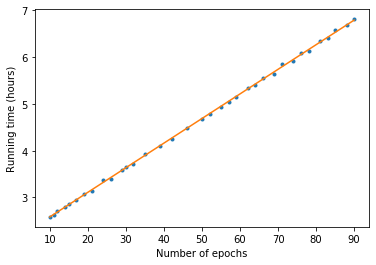

In [31]:
xlabel('Number of epochs')
ylabel('Running time (hours)')
plot(x, y, '.')
plot(x, f(x,a,b))

from math import modf

m, h = modf(b)
bstr = f'{int(h)}h{round(60*m)}m'
astr = f'{int(round(3600*a, 0))}s'
print(f'Running time is {bstr} plus {astr} per epoch')